In [111]:
import numpy as np
import matplotlib.pyplot as plt
import math
import cmocean.cm as cm
from waveErosion_classV2 import waveErosion
import pandas as pd
import matplotlib as mpl


In [112]:
mpl.rcParams['lines.linewidth'] = 2
mpl.rcParams['axes.titlesize'] = 14
mpl.rcParams['axes.labelsize'] = 14
mpl.rcParams['xtick.labelsize'] = 12
mpl.rcParams['ytick.labelsize'] = 12
mpl.rcParams['axes.grid'] = True
mpl.rcParams['grid.alpha'] = 0.25
mpl.rcParams['legend.fontsize'] = 12


In [113]:
def beaufort_scale(wave_H):
        if wave_H < 0.1:
            Ss = 0  # Calm
        elif wave_H < 0.2:
            Ss = 1  # Light air
        elif wave_H < 0.3:
            Ss = 2  # Light breeze
        elif wave_H < 1:
            Ss = 3  # Gentle breeze
        elif wave_H < 1.5:
            Ss = 4  # Moderate breeze
        elif wave_H < 2.5:
            Ss = 5  # Fresh breeze
        elif wave_H < 4:
            Ss = 6  # Strong breeze
        elif wave_H < 5.5:
            Ss = 7  # Near gale
        elif wave_H < 7.5:
            Ss = 8  # Gale
        elif wave_H < 10:
            Ss = 9  # Strong gale
        elif wave_H < 12.5:
            Ss = 10  # Storm
        else:
            Ss = np.nan()
        return Ss

In [114]:
d_ocean = 500
d = 250
d_ice = 100
dz = 1
B = 100
Nz = int(d/dz)
ice_idx = -int(d_ice/dz)
z = np.linspace(-d, 0, Nz)

domain_x = np.array([d_ocean, d, d_ice, dz, B])

modelType = 1
meltType = 0
printCheck = 0
model_x = np.array([modelType, meltType, printCheck])

wave_H = 2
lamb = 100
theta = 0 
wave_x = np.array([wave_H, lamb, theta])

Ubg = np.ones(Nz) * 0.05
Tbg = np.ones(Nz) * 2
Sbg = np.ones(Nz) * 34

background_x = np.zeros((3, Nz))
background_x[0,:] = Ubg
background_x[1,:] = Tbg
background_x[2,:] = Sbg

startTime = 0
endTime = 20000
dt = 1
checkFreq = 100
iterativeType = 0 
iterative_x = np.array([startTime, endTime, dt, checkFreq, iterativeType])

Ss = beaufort_scale(wave_H)
C = 0

In [115]:
m_init = np.ones(Nz) * 5e-5
init_Tb = Tbg
init_Sb = Sbg

init_b = np.ones(Nz) * 5
init_Tn = Tbg
init_Sn = Sbg
init_Us = 0.01
init_Up = 0.01

init_B = np.ones(Nz) * B
init_Ti = Tbg
init_Si = Sbg
init_Uif = 0.01
init_Uin = 0.01

initial_x = np.zeros((13, Nz))

initial_x[0,:] = m_init
initial_x[1,:] = init_Tb
initial_x[2,:] = init_Sb

initial_x[3,:] = init_b
initial_x[4,:] = init_Tn
initial_x[5,:] = init_Sn

initial_x[6,:] = init_Us
initial_x[7,:] = init_Up

initial_x[8,:] = init_B
initial_x[9,:] = init_Ti
initial_x[10,:] = init_Si
initial_x[11,:] = init_Uif
initial_x[12,:] = init_Uin

In [116]:
modelType = 1
model_x = np.array([modelType, meltType, printCheck])
base = waveErosion(model_x, wave_x, domain_x, background_x, iterative_x, initial_x)
m1, Tb1, Sb1 = waveErosion.getModelOutput(base)

modelType = 2
model_x = np.array([modelType, meltType, printCheck])
ocean = waveErosion(model_x, wave_x, domain_x, background_x, iterative_x, initial_x)
m2, Tb2, Sb2, b2, Tn2, Sn2, rho_n2, Us2 = waveErosion.getModelOutput(ocean)

modelType = 3
model_x = np.array([modelType, meltType, printCheck])
plume = waveErosion(model_x, wave_x, domain_x, background_x, iterative_x, initial_x)
m3, Tb3, Sb3, b3, Tn3, Sn3, rho_n3, Us3, Up3 = waveErosion.getModelOutput(plume)

modelType = 4
model_x = np.array([modelType, meltType, printCheck])
horizontal = waveErosion(model_x, wave_x, domain_x, background_x, iterative_x, initial_x)
m4, Tb4, Sb4, b4, Tn4, Sn4, rho_n4, Us4, Up4, B4, Ti4, Si4, rho_i4, Uif4, Uin4 = waveErosion.getModelOutput(horizontal)


Making Domain.
Calculating Wave Orbital Velocities.
Setting Melt Constants.
Building Iteration arrays
Setting initial conditions and building solver arrays.
Preparing to Run the Base Model.                   Total Layers = 250,                   Total iterations = 200.                   dt = 1
Finished running. Total time = 0.00s

Making Domain.
Calculating Wave Orbital Velocities.
Setting Melt Constants.
Building Iteration arrays
Setting initial conditions and building solver arrays.
Preparing to Run the Ocean Transport Model.                   Total Layers = 250,                   Total iterations = 200.                   dt = 1
Running the Ocean Transport Model.
Iteration 99, time = 100s, index = 0, dt = 1s
Iteration 199, time = 200s, index = 1, dt = 1s
Iteration 299, time = 300s, index = 2, dt = 1s
Iteration 399, time = 400s, index = 3, dt = 1s
Iteration 499, time = 500s, index = 4, dt = 1s
Iteration 599, time = 600s, index = 5, dt = 1s
Iteration 699, time = 700s, index = 6, dt = 1

/Users/mmamer3/Documents/wave/waveErosion_classV2.py:1192: RuntimeWarning: divide by zero encountered in scalar divide
  dt1 = 0.5 * self.dz/w_max


Iteration 2399, time = 2400s, index = 23, dt = 1s
Iteration 2499, time = 2500s, index = 24, dt = 1s
Iteration 2599, time = 2600s, index = 25, dt = 1s
Iteration 2699, time = 2700s, index = 26, dt = 1s
Iteration 2799, time = 2800s, index = 27, dt = 1s
Iteration 2899, time = 2900s, index = 28, dt = 1s
Iteration 2999, time = 3000s, index = 29, dt = 1s
Iteration 3099, time = 3100s, index = 30, dt = 1s
Iteration 3199, time = 3200s, index = 31, dt = 1s
Iteration 3299, time = 3300s, index = 32, dt = 1s
Iteration 3399, time = 3400s, index = 33, dt = 1s
Iteration 3499, time = 3500s, index = 34, dt = 1s
Iteration 3599, time = 3600s, index = 35, dt = 1s
Iteration 3699, time = 3700s, index = 36, dt = 1s
Iteration 3799, time = 3800s, index = 37, dt = 1s
Iteration 3899, time = 3900s, index = 38, dt = 1s
Iteration 3999, time = 4000s, index = 39, dt = 1s
Iteration 4099, time = 4100s, index = 40, dt = 1s
Iteration 4199, time = 4200s, index = 41, dt = 1s
Iteration 4299, time = 4300s, index = 42, dt = 1s


In [117]:
white_m = waveErosion.white1980(base)
silva_m = waveErosion.silva2006(base, Ss, 0.5)

white_mB = waveErosion.white1980_B(base) ## with Tbg - Tm instead of Tb
silva_mB = waveErosion.silva2006_B(base, Ss, 0.5) ## with + 2

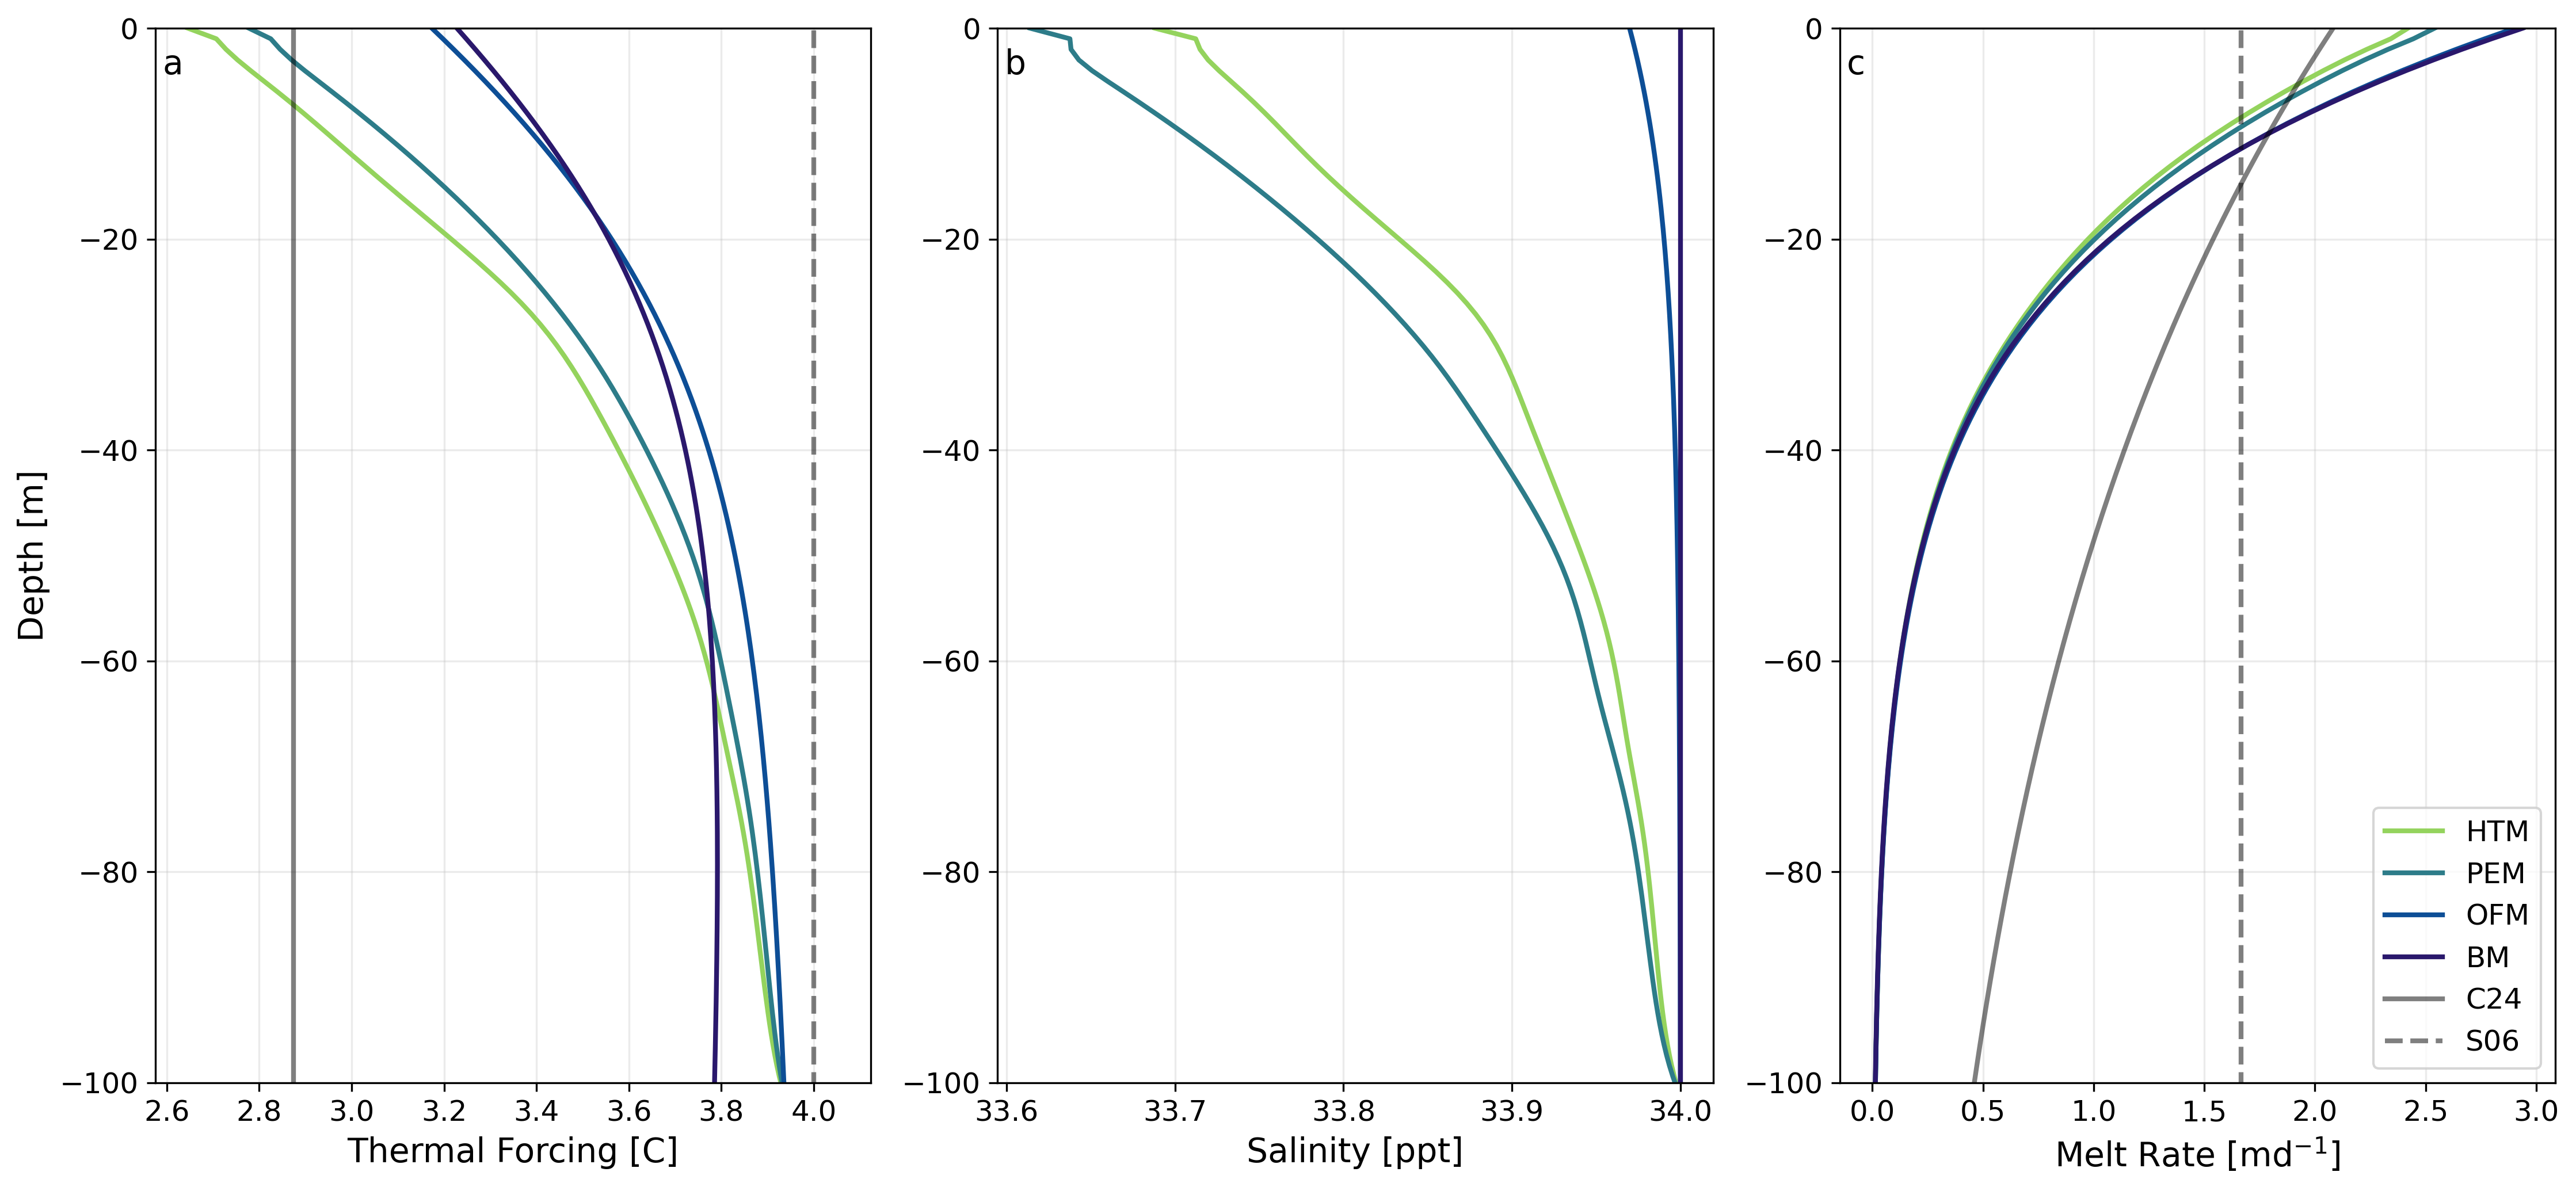

In [119]:
fig, ax = plt.subplots(1,3, figsize = (15,7), dpi = 300)

cmap = cm.haline(np.linspace(0, 1, 6))

## First Panel - Plotting Thermal Forcing ##
ax[0].plot(Tn4[-1,:] - Tb4[-1,:], z, color = cmap[4], label = 'HTM')
ax[0].plot(Tn3[-1,:] - Tb3[-1,:], z, color = cmap[2], label = 'PEM')
ax[0].plot(Tn2[-1,:] - Tb2[-1,:], z, color = cmap[1], label = 'OFM')
ax[0].plot(Tbg[:] - Tb1[-1,:], z, color = cmap[0], label = 'BM')

Tm = (-1.80) * np.exp(-0.19 * (Tbg - (-1.80))) ## 1.80 freezing point of temperature
ax[0].plot(Tbg[:] - Tm, z, color = 'k', alpha = 0.5, linestyle = '-', label = 'C24') ## Crawford et. al 2024
ax[0].plot(Tbg[:] + 2, z, color = 'k', alpha = 0.5, linestyle = '--', label = 'S06') ## Silva et. al 2006

## Second Panel - Plotting Salinity ##
ax[1].plot(Sn4[-1,:], z, color = cmap[4], label = 'HTM')
# ax[1].plot(Sb4[-1,:], z, color = cmap[4], linestyle = '--')
# ax[1].plot(Si4[-1,:], z, color = cmap[4], linestyle = ':')

ax[1].plot(Sn3[-1,:], z, color = cmap[2], label = 'PEM')
# ax[1].plot(Sb3[-1,:], z, color = cmap[2], linestyle = '--')

ax[1].plot(Sn2[-1,:], z , color = cmap[1], label = 'OFM')
# ax[1].plot(Sb2[-1,:], z, color = cmap[1], linestyle = '--')

ax[1].plot(Sbg[:], z, color = cmap[0], label = 'BM')

## Third Panel - Plotting Melt Rate in m/d ##
ax[2].plot(m4[-1,:] * 24 * 3600, z, color = cmap[4], label = 'HTM')
ax[2].plot(m3[-1,:]* 24 * 3600, z, color = cmap[2], label = 'PEM')
ax[2].plot(m2[-1,:]* 24 * 3600, z , color = cmap[1], label = 'OFM')
ax[2].plot(m1[-1,:]* 24 * 3600, z, color = cmap[0], label = 'BM')
ax[2].plot(white_mB[:]* 24 * 3600, z, color = 'k', alpha = 0.5, linestyle = '-', label = 'C24')
ax[2].plot(silva_mB[:], z, color = 'k', alpha = 0.5, linestyle = '--', label = 'S06')

for i in range(0,3):
    ax[i].grid(alpha = 0.25)
    ax[i].set_ylim(-d_ice,0)

ax[0].set_ylabel('Depth [m]')
ax[0].set_xlabel('Thermal Forcing [C]')
ax[1].set_xlabel('Salinity [ppt]')
ax[2].set_xlabel('Melt Rate [md$^{-1}$]')
ax[2].legend(loc = 4)
plt.tight_layout()

# Get lowercase letters a-i
letters = ['a', 'b', 'c']

# Loop over each subplot and add the letter in the lower-left corner
for i, axis in enumerate(ax.flat):
    axis.text(0.01, 0.95, letters[i], transform=axis.transAxes,
            fontsize=14, verticalalignment='bottom', horizontalalignment='left')

fig.savefig('allModels_std.jpg', dpi = 300)

In [121]:
(m3[-1,-1] - m2[-1,-1])/m2[-1,-1], (m4[-1,-1] - m2[-1,-1])/m2[-1,-1]

(-0.12495540863158386, -0.16648442746147038)

In [100]:
np.mean(silva_mB[ice_idx:]) / np.mean(m1[-1,ice_idx:] * 24 * 3600)

2.859563375678865

In [127]:
np.mean(white_mB[ice_idx:])/np.mean(m1[-1,ice_idx:])

1.8544083289439581

(-20.0, 0.0)

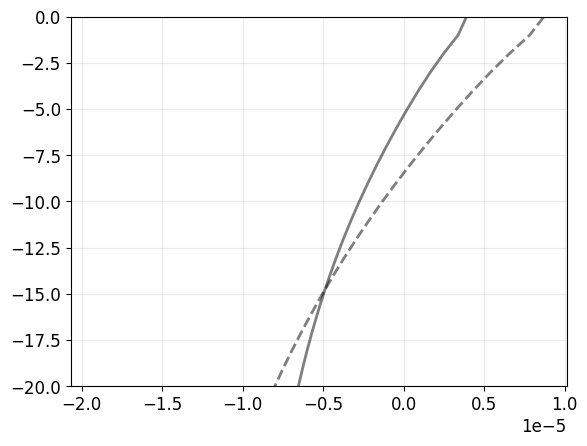

In [125]:
plt.plot(m4[-1,:] - silva_mB[:]/(24*3600), z, color = 'k', alpha = 0.5, linestyle ='--')
plt.plot(m4[-1,:] - white_mB[:], z, color = 'k', alpha = 0.5, linestyle ='-')
plt.ylim(-20,0)

In [102]:
print(f'Model 4 Depth Integrated Melt Rate {np.sum(m4[-1,ice_idx:]* 24 * 3600).round(2)}')
print(f'Model 3 Depth Integrated Melt Rate {np.sum(m2[-1,ice_idx:]* 24 * 3600).round(2)}')
print(f'Model 2 Depth Integrated Melt Rate {np.sum(m3[-1,ice_idx:]* 24 * 3600).round(2)}')
print(f'Model 1 Depth Integrated Melt Rate {np.sum(m1[-1,ice_idx:]* 24 * 3600).round(2)}')

print(f'Model C24 Depth Integrated Melt Rate {np.sum(white_mB[ice_idx:]* 24 * 3600).round(2)}')
print(f'Model S6 Depth Integrated Melt Rate {np.sum(silva_mB[ice_idx:]).round(2)}')

Model 4 Depth Integrated Melt Rate 52.03
Model 3 Depth Integrated Melt Rate 58.47
Model 2 Depth Integrated Melt Rate 53.73
Model 1 Depth Integrated Melt Rate 58.28
Model C24 Depth Integrated Melt Rate 108.08
Model S6 Depth Integrated Melt Rate 166.67


Making Domain.
Calculating Wave Orbital Velocities.
Setting Melt Constants.
Building Iteration arrays
Setting initial conditions and building solver arrays.
Preparing to Run the Plume Transport Model.                   Total Layers = 250,                   Total iterations = 200.                   dt = 1
Running the Plume Transport Model.
Iteration 135, time = 100.333s, index = 0, dt = 0.6754651311941792s
Iteration 345, time = 200.855s, index = 1, dt = 0.8797365465183986s
Iteration 445, time = 300.121s, index = 2, dt = 1s
Iteration 546, time = 400.23s, index = 3, dt = 0.7551222123897897s
Iteration 662, time = 500.735s, index = 4, dt = 1s
Iteration 762, time = 600.735s, index = 5, dt = 1s
Iteration 862, time = 700.735s, index = 6, dt = 1s
Iteration 962, time = 800.735s, index = 7, dt = 1s
Iteration 1062, time = 900.735s, index = 8, dt = 1s
Iteration 1162, time = 1000.735s, index = 9, dt = 1s
Iteration 1262, time = 1100.735s, index = 10, dt = 1s
Iteration 1362, time = 1200.735s, index = 

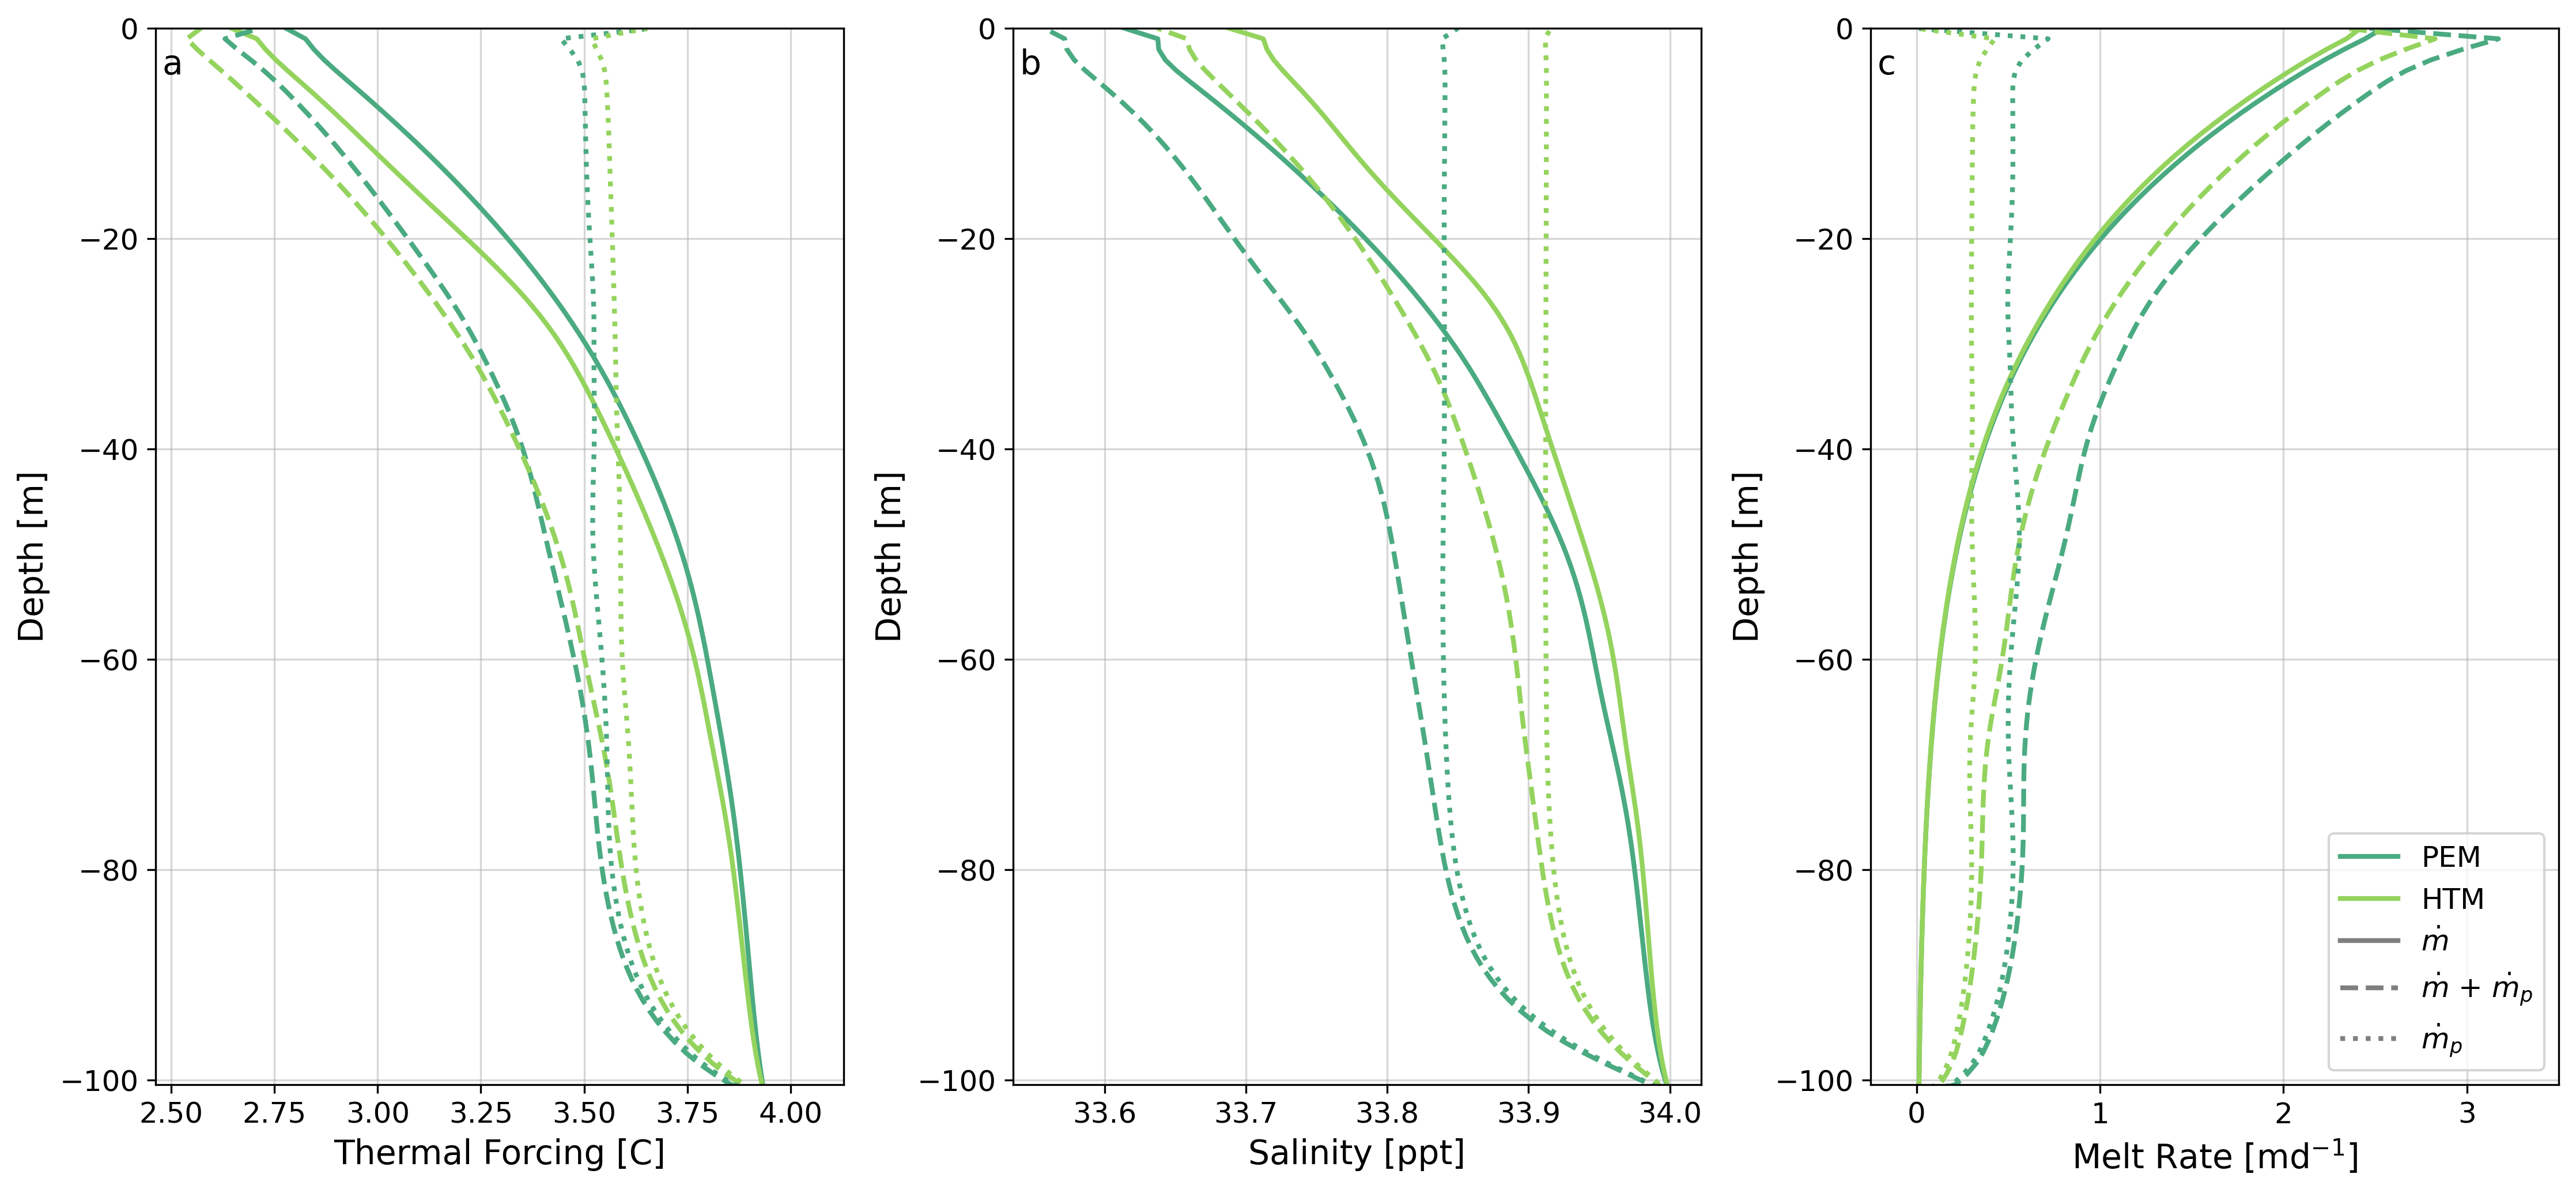

In [103]:
styles = ['-','--',':']
fig, ax = plt.subplots(1, 3, figsize = (15,7), dpi = 300)
cmap = cm.haline(np.linspace(0, 1, 6))

i = 0
for meltType in np.array([0,1,2]):
    modelType = 3
    model_x = np.array([modelType, meltType, printCheck])
    plume = waveErosion(model_x, wave_x, domain_x, background_x, iterative_x, initial_x)
    m3, Tb3, Sb3, b3, Tn3, Sn3, rho_n3, Us3, Up3 = waveErosion.getModelOutput(plume)

    modelType = 4
    model_x = np.array([modelType, meltType, printCheck])
    horizontal = waveErosion(model_x, wave_x, domain_x, background_x, iterative_x, initial_x)
    m4, Tb4, Sb4, b4, Tn4, Sn4, rho_n4, Us4, Up4, B4, Ti4, Si4, rho_i4, Uif4, Uin4 = waveErosion.getModelOutput(horizontal)

    if meltType == 0:
        a, = ax[2].plot(m3[-1,:] * 24* 3600, z, color = cmap[3], linestyle = styles[i])
        b, = ax[2].plot(m4[-1,:] * 24 * 3600, z,color = cmap[4], linestyle = styles[i])
    else:
        ax[2].plot(m3[-1,:] * 24* 3600, z, color = cmap[3], linestyle = styles[i])
        ax[2].plot(m4[-1,:] * 24 * 3600, z,color = cmap[4], linestyle = styles[i])

    ax[0].plot(Tn3[-1,:] - Tb3[-1,:], z, color = cmap[3], linestyle = styles[i])
    ax[0].plot(Tn4[-1,:] - Tb4[-1,:], z,color = cmap[4], linestyle = styles[i])

    ax[1].plot(Sn3[-1,:], z, color = cmap[3], linestyle = styles[i])
    ax[1].plot(Sn4[-1,:], z,color = cmap[4], linestyle = styles[i])

    i = i + 1

c, = ax[2].plot(np.ones(5) * 5, np.linspace(-100,0,5), color = 'k', alpha = 0.5, linestyle ='-', label = '$\dot{m}$')
d, = ax[2].plot(np.ones(5) * 5, np.linspace(-100,0,5), color = 'k', alpha = 0.5, linestyle ='--', label = '$\dot{m}$ + $\dot{m}_{p}$')
e, = ax[2].plot(np.ones(5) * 5, np.linspace(-100,0,5), color = 'k', alpha = 0.5, linestyle =':', label = '$\dot{m}_{p}$')

ax[0].set_ylim(z[ice_idx-1],0)
# ax[0].set_xlim(0,3.5)
ax[0].grid(alpha = 0.5)
ax[0].set_xlabel('Thermal Forcing [C]')
ax[0].set_ylabel('Depth [m]')

ax[1].set_ylim(z[ice_idx-1],0)
# ax[1].set_xlim(0,3.5)
ax[1].grid(alpha = 0.5)
ax[1].set_xlabel('Salinity [ppt]')
ax[1].set_ylabel('Depth [m]')

ax[2].set_ylim(z[ice_idx-1],0)
ax[2].set_xlim(-0.25,3.5)
ax[2].grid(alpha = 0.5)
ax[2].set_xlabel('Melt Rate [md$^{-1}$]')
ax[2].set_ylabel('Depth [m]')

# Get lowercase letters a-i
letters = ['a', 'b', 'c']

# Loop over each subplot and add the letter in the lower-left corner
for i, axis in enumerate(ax.flat):
    axis.text(0.01, 0.95, letters[i], transform=axis.transAxes,
            fontsize=14, verticalalignment='bottom', horizontalalignment='left')

ax[2].legend([a,b,c,d,e],['PEM','HTM', '$\dot{m}$', '$\dot{m}$ + $\dot{m}_{p}$', '$\dot{m}_{p}$'])
plt.tight_layout()
plt.savefig('plume_wave_comparison.jpg')

In [104]:
modelType = 3
meltType = 0
model_x = np.array([modelType, meltType, printCheck])
plume = waveErosion(model_x, wave_x, domain_x, background_x, iterative_x, initial_x)
m3_w, Tb3_w, Sb3_w, b3_w, Tn3_w, Sn3_w, rho_n3_w, Us3_w, Up3_w = waveErosion.getModelOutput(plume)

modelType = 4
model_x = np.array([modelType, meltType, printCheck])
horizontal = waveErosion(model_x, wave_x, domain_x, background_x, iterative_x, initial_x)
m4_w, Tb4_w, Sb4_w, b4_w, Tn4_w, Sn4_w, rho_n4_w, Us4_w, Up4_w, B4_w, Ti4_w, Si4_w, rho_i4_w, Uif4_w, Uin4_w = waveErosion.getModelOutput(horizontal)

modelType = 3
meltType = 1
model_x = np.array([modelType, meltType, printCheck])
plume = waveErosion(model_x, wave_x, domain_x, background_x, iterative_x, initial_x)
m3_wp, Tb3_wp, Sb3_wp, b3_wp, Tn3_wp, Sn3_wp, rho_n3_wp, Us3_wp, Up3_wp = waveErosion.getModelOutput(plume)

modelType = 4
model_x = np.array([modelType, meltType, printCheck])
horizontal = waveErosion(model_x, wave_x, domain_x, background_x, iterative_x, initial_x)
m4_wp, Tb4_wp, Sb4_wp, b4_wp, Tn4_wp, Sn4_wp, rho_n4_wp, Us4_wp, Up4_wp, B4_wp, Ti4_wp, Si4_wp, rho_i4_wp, Uif4_wp, Uin4_wp = waveErosion.getModelOutput(horizontal)

modelType = 3
meltType = 2
model_x = np.array([modelType, meltType, printCheck])
plume = waveErosion(model_x, wave_x, domain_x, background_x, iterative_x, initial_x)
m3_p, Tb3_p, Sb3_p, b3_p, Tn3_p, Sn3_p, rho_n3_p, Us3_p, Up3_p = waveErosion.getModelOutput(plume)

modelType = 4
model_x = np.array([modelType, meltType, printCheck])
horizontal = waveErosion(model_x, wave_x, domain_x, background_x, iterative_x, initial_x)
m4_p, Tb4_p, Sb4_p, b4_p, Tn4_p, Sn4_p, rho_n4_p, Us4_p, Up4_p, B4_p, Ti4_p, Si4_p, rho_i4_p, Uif4_p, Uin4_p = waveErosion.getModelOutput(horizontal)

Making Domain.
Calculating Wave Orbital Velocities.
Setting Melt Constants.
Building Iteration arrays
Setting initial conditions and building solver arrays.
Preparing to Run the Plume Transport Model.                   Total Layers = 250,                   Total iterations = 200.                   dt = 1
Running the Plume Transport Model.
Iteration 135, time = 100.333s, index = 0, dt = 0.6754651311941792s
Iteration 345, time = 200.855s, index = 1, dt = 0.8797365465183986s
Iteration 445, time = 300.121s, index = 2, dt = 1s
Iteration 546, time = 400.23s, index = 3, dt = 0.7551222123897897s
Iteration 662, time = 500.735s, index = 4, dt = 1s
Iteration 762, time = 600.735s, index = 5, dt = 1s
Iteration 862, time = 700.735s, index = 6, dt = 1s
Iteration 962, time = 800.735s, index = 7, dt = 1s
Iteration 1062, time = 900.735s, index = 8, dt = 1s
Iteration 1162, time = 1000.735s, index = 9, dt = 1s
Iteration 1262, time = 1100.735s, index = 10, dt = 1s
Iteration 1362, time = 1200.735s, index = 

/var/folders/b0/25x33fpn6_jcyj0hj0v0_qpw02w58x/T/ipykernel_17860/2259541009.py:1: RuntimeWarning: invalid value encountered in divide
  plt.plot(Up4_w[-1,:-1]/Up4_wp[-1,:-1], z[:-1])
/var/folders/b0/25x33fpn6_jcyj0hj0v0_qpw02w58x/T/ipykernel_17860/2259541009.py:2: RuntimeWarning: invalid value encountered in divide
  plt.plot(Up4_p[-1,:-1]/Up4_wp[-1,:-1], z[:-1])


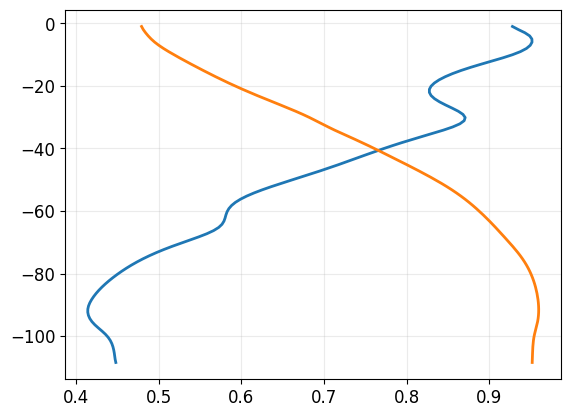

In [105]:
plt.plot(Up4_w[-1,:-1]/Up4_wp[-1,:-1], z[:-1])
plt.plot(Up4_p[-1,:-1]/Up4_wp[-1,:-1], z[:-1])

# plt.plot(m4_p[-1,:-1]/m4_wp[-1,:-1], z[:-1])
# plt.xlim(0.05,0.9)

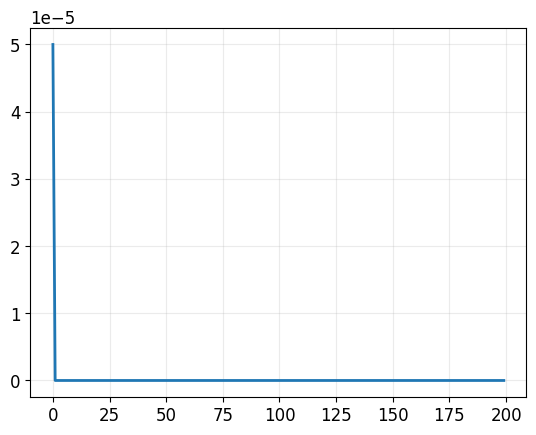

In [106]:
plt.plot(m4_p[:,-1])